In [1]:
import pandas as pd
df=pd.read_excel("финальные данные 2.xlsx").drop(columns=["Unnamed: 0"])

In [2]:
import plotly.io as pio
pio.renderers.default='svg'

In [3]:
pd.set_option('max_columns', 60)
df.head()

,price,roomsCount,isStudio,totalArea,developerName,jkName,floorNumber,floorsCount,longitude,latitude,name railway station_0,distance railway station_0,name metro station_0,distance metro station_0,name metro station_1,distance metro station_1,name metro station_2,distance metro station_2,name metro station_3,distance metro station_3,name metro station_4,distance metro station_4,name metro station_5,distance metro station_5,name metro station_6,distance metro station_6,name metro station_7,distance metro station_7,name metro station_8,distance metro station_8,buildYear,materialType,offerType,isPhone,rayon,description,livingArea,kitchenArea,isPartOfRenovationProgram,name railway station_1,distance railway station_1,name railway station_2,distance railway station_2,name railway station_3,distance railway station_3,name railway station_4,distance railway station_4,name metro station_9,distance metro station_9,name railway station_5,distance railway station_5,name railway station_6,distance railway station_6,name railway station_7,distance railway station_7
0,79530000.0,3.0,0.0,143.0,АО «ИНТЕКО»,ЖК «Садовые Кварталы»,2.0,14.0,37.570500,55.725610,Москва Киевская,1.888,Спортивная,0.609,Фрунзенская,0.643,Лужники,0.828,Парк культуры,1.763,Воробьевы Горы,1.830,Студенческая,2.021,Киевская,2.072,Ленинский проспект,2.227,Площадь Гагарина,2.281,NaN,Монолит,Новостройка,1.0,Хамовники,«Садовые кварталы» - уникальная концепция прем...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31675855.0,2.0,0.0,106.0,ООО «Бакунинская»,Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...,8.0,12.0,37.679560,55.773980,Москва Казанская,1.233,Бауманская,0.178,Красносельская,1.069,Комсомольская,1.567,Сокольники,1.694,Электрозаводская,1.848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Монолит,Новостройка,1.0,Басманный,"Предлагается 2-комнатные апартаменты, общей пл...",NaN,NaN,0.0,Москва Ярославская,1.513,Москва Ленинградская,1.709,Каланчёвская,1.781,Электрозаводская,1.804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8700000.0,2.0,0.0,41.4,NaN,NaN,2.0,17.0,37.191187,55.965546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Монолит,Вторичная,1.0,Зеленоград,Евродвушка на базе 1-комнатной квартиры свобод...,29 м²,8 м²,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27500000.0,3.0,0.0,80.0,NaN,NaN,5.0,8.0,37.555609,55.747897,Москва Киевская,0.798,Киевская,0.803,Выставочная,0.812,Деловой центр,1.020,Студенческая,1.112,Международная,1.420,Деловой центр (МЦК),1.489,Кутузовская,1.594,Смоленская,1.641,NaN,NaN,1957.0,Кирпич,Вторичная,1.0,Дорогомилово,Лот 62247. В западном округе Москвы в кирпично...,NaN,NaN,0.0,Тестовская,1.658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26500000.0,3.0,0.0,90.2,NaN,NaN,9.0,14.0,37.636845,55.699694,ЗИЛ,0.980,ЗИЛ,0.789,Тульская,1.356,Автозаводская,1.485,Верхние котлы,1.593,Технопарк,1.796,Нагатинская,1.983,Крымская,2.265,NaN,NaN,NaN,NaN,NaN,Монолит,Вторичная,1.0,Даниловский,"Id 18914. ВНИМАНИЕ, СУПЕР ПРЕДЛОЖЕНИЕ. Предлаг...",46.1 м²,20.5 м²,0.0,Москва Товарная,1.322,Нижние Котлы,2.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#смотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20965 entries, 0 to 20964
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       20964 non-null  float64
 1   roomsCount                  17683 non-null  float64
 2   isStudio                    20964 non-null  float64
 3   totalArea                   20964 non-null  float64
 4   developerName               10265 non-null  object 
 5   jkName                      10278 non-null  object 
 6   floorNumber                 20900 non-null  float64
 7   floorsCount                 20900 non-null  float64
 8   longitude                   20964 non-null  float64
 9   latitude                    20964 non-null  float64
 10  name railway station_0      16670 non-null  object 
 11  distance railway station_0  16670 non-null  float64
 12  name metro station_0        19592 non-null  object 
 13  distance metro station_0    195

In [5]:
#сделаем целыми значениями следующие столбцы: roomsCount,isStudio,floorNumber,floorsCount,buildYear,isPhone,isPartOfRenovationProgram
#сначала во все столбцы, где есть пропуски, вставим в пустые ячейки значение -1.0
for column in ["roomsCount","isStudio","floorNumber","floorsCount","buildYear","isPhone","isPartOfRenovationProgram"]:
    df[column].fillna(-1.0,inplace=True)
    df[column]=df[column].astype("int32")

In [6]:
df

,price,roomsCount,isStudio,totalArea,developerName,jkName,floorNumber,floorsCount,longitude,latitude,name railway station_0,distance railway station_0,name metro station_0,distance metro station_0,name metro station_1,distance metro station_1,name metro station_2,distance metro station_2,name metro station_3,distance metro station_3,name metro station_4,distance metro station_4,name metro station_5,distance metro station_5,name metro station_6,distance metro station_6,name metro station_7,distance metro station_7,name metro station_8,distance metro station_8,buildYear,materialType,offerType,isPhone,rayon,description,livingArea,kitchenArea,isPartOfRenovationProgram,name railway station_1,distance railway station_1,name railway station_2,distance railway station_2,name railway station_3,distance railway station_3,name railway station_4,distance railway station_4,name metro station_9,distance metro station_9,name railway station_5,distance railway station_5,name railway station_6,distance railway station_6,name railway station_7,distance railway station_7
0,79530000.0,3,0,143.0,АО «ИНТЕКО»,ЖК «Садовые Кварталы»,2,14,37.570500,55.725610,Москва Киевская,1.888,Спортивная,0.609,Фрунзенская,0.643,Лужники,0.828,Парк культуры,1.763,Воробьевы Горы,1.830,Студенческая,2.021,Киевская,2.072,Ленинский проспект,2.227,Площадь Гагарина,2.281,-1,Монолит,Новостройка,1,Хамовники,«Садовые кварталы» - уникальная концепция прем...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31675855.0,2,0,106.0,ООО «Бакунинская»,Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...,8,12,37.679560,55.773980,Москва Казанская,1.233,Бауманская,0.178,Красносельская,1.069,Комсомольская,1.567,Сокольники,1.694,Электрозаводская,1.848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Монолит,Новостройка,1,Басманный,"Предлагается 2-комнатные апартаменты, общей пл...",NaN,NaN,0,Москва Ярославская,1.513,Москва Ленинградская,1.709,Каланчёвская,1.781,Электрозаводская,1.804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8700000.0,2,0,41.4,NaN,NaN,2,17,37.191187,55.965546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Монолит,Вторичная,1,Зеленоград,Евродвушка на базе 1-комнатной квартиры свобод...,29 м²,8 м²,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27500000.0,3,0,80.0,NaN,NaN,5,8,37.555609,55.747897,Москва Киевская,0.798,Киевская,0.803,Выставочная,0.812,Деловой центр,1.020,Студенческая,1.112,Международная,1.420,Деловой центр (МЦК),1.489,Кутузовская,1.594,Смоленская,1.641,NaN,NaN,1957,Кирпич,Вторичная,1,Дорогомилово,Лот 62247. В западном округе Москвы в кирпично...,NaN,NaN,0,Тестовская,1.658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26500000.0,3,0,90.2,NaN,NaN,9,14,37.636845,55.699694,ЗИЛ,0.980,ЗИЛ,0.789,Тульская,1.356,Автозаводская,1.485,Верхние котлы,1.593,Технопарк,1.796,Нагатинская,1.983,Крымская,2.265,NaN,NaN,NaN,NaN,-1,Монолит,Вторичная,1,Даниловский,"Id 18914. ВНИМАНИЕ, СУПЕР ПРЕДЛОЖЕНИЕ. Предлаг...",46.1 м²,20.5 м²,0,Москва Товарная,1.322,Нижние Котлы,2.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20960,26900000.0,3,0,102.0,NaN,NaN,2,8,37.658589,55.823388,Яуза,0.993,ВДНХ,1.119,Ростокино,1.871,Алексеевская,2.136,Ботанический сад,2.697,Белокаменная,2.837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958,Кирпич,Вторичная,1,Алексеевский,Предлагается просторная 3-комнатная квартира с...,63 м²,9 м²,0,Маленковская,1.045,Северянин,2.426,Москва-3,2.454,Рижская,3.398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20961,5587960.0,-1,1,19.6,ПИК,Жилой комплекс «Амурский парк»,30,33,37.755070,55.805920,NaN,NaN,Локомотив,0.643,Черкизовская,0.721,Бульвар Рокоссовского,1.558,Партизанская,1.982,Измайлово,2.091,Измайловская,2.611,Преображенская площадь,2.736,Щелковская,2.769,Первомайская,3.061,2009,Панель,Новостройка,

In [7]:
#пропуски в livingArea и kitchenArea также заполним -1.0 м²
for column in ["livingArea","kitchenArea"]:
    df[column].fillna("-1.0 м²",inplace=True)
    df[column]=[item.split(" ")[0] for item in list(df[column])]

In [8]:
df[["livingArea","kitchenArea"]]

,livingArea,kitchenArea
0,-1.0,-1.0
1,-1.0,-1.0
2,29,8
3,-1.0,-1.0
4,46.1,20.5
...,...,...
20960,63,9
20961,9.4,5
20962,13.4,13.7
20963,-1.0,-1.0


In [9]:
for class_type,index in zip(df.dtypes,df.dtypes.index):
    if class_type=="object":
        df[index].fillna("нет",inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20965 entries, 0 to 20964
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       20964 non-null  float64
 1   roomsCount                  20965 non-null  int32  
 2   isStudio                    20965 non-null  int32  
 3   totalArea                   20964 non-null  float64
 4   developerName               20965 non-null  object 
 5   jkName                      20965 non-null  object 
 6   floorNumber                 20965 non-null  int32  
 7   floorsCount                 20965 non-null  int32  
 8   longitude                   20964 non-null  float64
 9   latitude                    20964 non-null  float64
 10  name railway station_0      20965 non-null  object 
 11  distance railway station_0  16670 non-null  float64
 12  name metro station_0        20965 non-null  object 
 13  distance metro station_0    195

In [11]:
#посмотрим, сколько пропусков у столбцов с данными по расстоянию до ж/д станций и станций метро
df=df.dropna(subset=["price"])
railway_metro_distance_labels=df.isna().sum()[df.isna().sum()>0].index
df.isna().sum()[df.isna().sum()>0]

distance railway station_0     4294
distance metro station_0       1372
distance metro station_1       1724
distance metro station_2       2389
distance metro station_3       3551
distance metro station_4       4783
distance metro station_5       6438
distance metro station_6       9679
distance metro station_7      13266
distance metro station_8      17030
distance railway station_1     6827
distance railway station_2    10645
distance railway station_3    14548
distance railway station_4    18086
distance metro station_9      18986
distance railway station_5    19626
distance railway station_6    20391
distance railway station_7    20962
dtype: int64

<b>Можно сократить количество указанных станций метро до 5, ж/д станций - до двух</b>

In [12]:
sorted(railway_metro_distance_labels)

['distance metro station_0',
 'distance metro station_1',
 'distance metro station_2',
 'distance metro station_3',
 'distance metro station_4',
 'distance metro station_5',
 'distance metro station_6',
 'distance metro station_7',
 'distance metro station_8',
 'distance metro station_9',
 'distance railway station_0',
 'distance railway station_1',
 'distance railway station_2',
 'distance railway station_3',
 'distance railway station_4',
 'distance railway station_5',
 'distance railway station_6',
 'distance railway station_7']

In [13]:
#количество станций метро
df["metroCount"]=df[sorted(railway_metro_distance_labels)[0:10]].count(axis=1)
df["metroCount"]

<ipython-input-13-c91643b8c373>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         9
1         5
2         0
3         8
4         7
         ..
20960     5
20961    10
20962     3
20963     6
20964    10
Name: metroCount, Length: 20964, dtype: int64

In [14]:
#количество ж/д станций
df["railwayCount"]=df[sorted(railway_metro_distance_labels)[10:]].count(axis=1)
df["railwayCount"]

<ipython-input-14-88f09c9a640c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        1
1        5
2        0
3        2
4        3
        ..
20960    5
20961    0
20962    4
20963    4
20964    0
Name: railwayCount, Length: 20964, dtype: int64

In [15]:
#сделаем столбцы с максимальным и минимальным расстоянием до ж/д станций и станций метро, затем удалим столбцы с  названиями
#каждой станции метро и расстояние до каждой станции
distance_metro_columns=[]
for i in range(0,10):
    distance_metro_columns.append("distance metro station_"+str(i))
distance_railway_columns=[]
for i in range(0,8):
    distance_railway_columns.append("distance railway station_"+str(i))
df["min_metro_distance"]=df[distance_metro_columns].min(axis=1)
df["min_railway_distance"]=df[distance_railway_columns].min(axis=1)
name_metro_columns=[]
name_railway_columns=[]
for word in distance_metro_columns:
    name_metro_columns.append(word.replace("distance","name"))
for word in distance_railway_columns:
    name_railway_columns.append(word.replace("distance","name"))
df.drop(columns=name_metro_columns,inplace=True)
df.drop(columns=name_railway_columns,inplace=True)
df.drop(columns=distance_metro_columns,inplace=True)
df.drop(columns=distance_railway_columns,inplace=True)

<ipython-input-15-0697379b4cf5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-0697379b4cf5>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
#заполним пропуски в столбцах с минимальным и максимальным расстоянием до метро или жд максимальными значениями в этих столбцах
df["min_railway_distance"].fillna(max(df["min_railway_distance"]),inplace=True)
df["min_metro_distance"].fillna(max(df["min_metro_distance"]),inplace=True)

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
#теперь осталось разобраться с данными, которые были заполнены с помощью -1. Посмотрим, у каких столбцов есть эти значения
df[df==-1].count()[df[df==-1].count()>0]

roomsCount                    3281
floorNumber                     64
floorsCount                     64
buildYear                    12687
isPartOfRenovationProgram       64
dtype: int64

<AxesSubplot:>

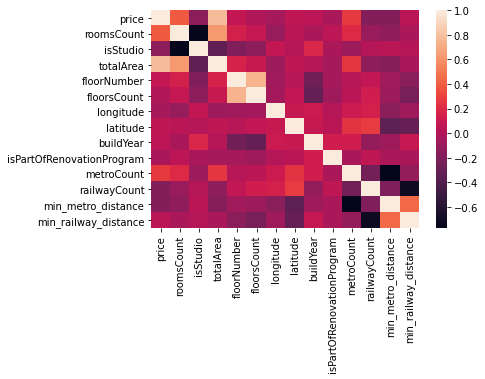

In [18]:
import seaborn as sns
sns.heatmap(df.drop(columns=["isPhone"]).corr().round(2))

In [19]:
#можно удалить пустые строки по столбцам floorNumber, floorsCount и isPartOfRenovationProgram, так как в них всего по 64
#пропущенные ячейки и, скорее всего, все пропуски находятся в одних и тех же строках
print("размерность датафрейма ДО удаления строк с пустыми ячейками:",df.shape)

размерность датафрейма ДО удаления строк с пустыми ячейками: (20964, 23)


In [20]:
dropped_indexes=df[["floorNumber","floorsCount","isPartOfRenovationProgram"]][df[["floorNumber","floorsCount","isPartOfRenovationProgram"]]==-1].dropna().index
df.drop(index=dropped_indexes,inplace=True)

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
print("размерность датафрейма ПОСЛЕ удаления строк с пустыми ячейками:",df.shape)

размерность датафрейма ПОСЛЕ удаления строк с пустыми ячейками: (20900, 23)


In [22]:
#в столбце buildYear зачастую отсутствуют данные у новостроек, проверим, сколько у них значений, равных -1
#сначала определим, сколько всего новостроек
df["offerType"][df["offerType"]=="Новостройка"].count()

10414

In [23]:
#всего пропусков в столбце buildYear
df[df==-1].count()[df[df==-1].count()>0]["buildYear"]

12623

In [24]:
#получается, что около 2200 пропусков из 12623 в столбце buildyear принадлежат значениям "нет" и "Вторичная", можно их также удалить
df.drop(index=df[df["offerType"].map(lambda x: x=="Вторичная" or x=="нет")][df["buildYear"]==-1].index,inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)
df

<ipython-input-24-cade98ed0dc3>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,price,roomsCount,isStudio,totalArea,developerName,jkName,floorNumber,floorsCount,longitude,latitude,buildYear,materialType,offerType,isPhone,rayon,description,livingArea,kitchenArea,isPartOfRenovationProgram,metroCount,railwayCount,min_metro_distance,min_railway_distance
0,79530000.0,3,0,143.0,АО «ИНТЕКО»,ЖК «Садовые Кварталы»,2,14,37.570500,55.725610,-1,Монолит,Новостройка,1,Хамовники,«Садовые кварталы» - уникальная концепция прем...,-1.0,-1.0,0,9,1,0.609,1.888
1,31675855.0,2,0,106.0,ООО «Бакунинская»,Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...,8,12,37.679560,55.773980,-1,Монолит,Новостройка,1,Басманный,"Предлагается 2-комнатные апартаменты, общей пл...",-1.0,-1.0,0,5,5,0.178,1.233
2,8700000.0,2,0,41.4,нет,нет,2,17,37.191187,55.965546,2014,Монолит,Вторичная,1,Зеленоград,Евродвушка на базе 1-комнатной квартиры свобод...,29,8,0,0,0,4.982,4.998
3,27500000.0,3,0,80.0,нет,нет,5,8,37.555609,55.747897,1957,Кирпич,Вторичная,1,Дорогомилово,Лот 62247. В западном округе Москвы в кирпично...,-1.0,-1.0,0,8,2,0.803,0.798
4,2300000.0,-1,1,10.7,нет,нет,1,9,37.596049,55.615044,1970,Панель,Вторичная,1,Чертаново Центральное,Продам уютную небольшую студию всего в 5 минут...,-1.0,-1.0,0,7,3,0.631,2.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18292,26900000.0,3,0,102.0,нет,нет,2,8,37.658589,55.823388,1958,Кирпич,Вторичная,1,Алексеевский,Предлагается просторная 3-комнатная квартира с...,63,9,0,5,5,1.119,0.993
18293,5587960.0,-1,1,19.6,ПИК,Жилой комплекс «Амурский парк»,30,33,37.755070,55.805920,2009,Панель,Новостройка,1,Гольяново,Новостройка! Продается 1-комн. кв-ра площадью ...,9.4,5,0,10,0,0.643,4.998
18294,7356768.0,1,0,38.9,ООО «Лексион Девелопмент»,ЖК «Румянцево-Парк»,11,22,37.418660,55.631650,-1,Монолит,Новостройка,1,нет,Скидка до 5% при 100% оплате! При покупке сраз...,13.4,13.7,0,3,4,1.052,2.387
18295,25106804.0,3,0,139.5,Компания «Capital Group» (Капитал Груп),ЖК «Триколор»,41,56,37.658030,55.834460,-1,Монолит,Новостройка,1,Ростокино,Жилой комплекс «Триколор» – это современные ин...,-1.0,-1.0,0,6,4,0.842,1.040


In [25]:
#вставляем значение следующего года (2021) у новостроек, т.к. они ещё не построены
df["buildYear"].replace(-1,2021,inplace=True)

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#теперь сделаем так, чтобы столбец buildYear показывал количество лет с постройки этого дома
df["buildYear"]=abs(df["buildYear"]-2021)

<ipython-input-26-f76b93041233>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#посмотрим, какие столбцы остались со значениями -1
df[df==-1].count()[df[df==-1].count()>0]

roomsCount    2936
dtype: int64

In [28]:
#т.к. это столбец с количеством комнат, посмотрим, сколько студий
df[df["roomsCount"]==-1][df["isStudio"]==1]

<ipython-input-28-6d5d01635279>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,price,roomsCount,isStudio,totalArea,developerName,jkName,floorNumber,floorsCount,longitude,latitude,buildYear,materialType,offerType,isPhone,rayon,description,livingArea,kitchenArea,isPartOfRenovationProgram,metroCount,railwayCount,min_metro_distance,min_railway_distance
4,2300000.0,-1,1,10.7,нет,нет,1,9,37.596049,55.615044,51,Панель,Вторичная,1,Чертаново Центральное,Продам уютную небольшую студию всего в 5 минут...,-1.0,-1.0,0,7,3,0.631,2.477
5,4900000.0,-1,1,22.1,нет,нет,1,5,37.547495,55.739803,87,Кирпич,Вторичная,1,Дорогомилово,Продается СТУДИЯ 22.1 м2 в двух минутах от мет...,-1.0,-1.0,0,8,2,0.126,0.995
7,5179900.0,-1,1,27.7,Компания Seven Suns Development (Севен Санс Де...,ЖК «Сказочный лес»,11,25,37.715290,55.849090,0,Монолит,Новостройка,1,Ярославский,Продаётся 1-комнатная квартира в новостройке Ж...,-1.0,-1.0,0,6,4,2.332,2.509
10,3400000.0,-1,1,16.0,нет,нет,1,5,37.703999,55.747687,63,Монолит,Вторичная,1,Лефортово,"Продается студия 16м, санузел совмещен. Год по...",-1.0,-1.0,0,5,5,0.933,1.163
14,8037559.0,-1,1,26.9,Level Group (Лэвел Групп),ЖК «Level Амурская» (Левел Амурская),34,39,37.759190,55.809310,0,Монолит,Новостройка,1,Гольяново,Продаётся 1-комнатная квартира в новостройке Ж...,-1.0,-1.0,0,10,0,1.071,4.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,5450000.0,-1,1,15.0,нет,нет,1,4,37.610009,55.747703,108,Кирпич,Вторичная,1,Хамовники,Отличный вариант! Студия в самом центре Москвы...,-1.0,-1.0,0,10,0,0.310,4.998
18264,4789980.0,-1,1,18.2,нет,нет,1,5,37.577229,55.787556,84,Кирпич,Вторичная,1,Беговой,НЕДОРОГАЯ АВТОНОМНАЯ СТУДИЯ В ПРЕСТИЖНОМ ИСТОР...,16,2,0,7,3,0.945,1.173
18278,3150000.0,-1,1,16.5,нет,нет,1,9,37.802850,55.722522,51,Панель,Вторичная,1,Вешняки,"Выгодное предложение, продается уютная студия ...",16.5,-1.0,0,3,7,0.817,0.287
18285,2650000.0,-1,1,13.0,нет,нет,1,12,37.767142,55.671047,40,Панель,Вторичная,1,Люблино,"Отличная локация в ЮВАО,район Люблино, одним и...",-1.0,-1.0,0,7,3,0.665,2.477


In [29]:
#так как подавляющее большинство пропусков в столбце roomsCount являются студиями, то вместо значения -1 вставим значение 1
#(будем считать, что студия - это однокомнатная квартира)
#сначала удалим строки, где квартиры не являются студиями и при этом не указано количество комнат
df.drop(index=df[df["roomsCount"]==-1][df["isStudio"]==0].index,inplace=True)

<ipython-input-29-b6e789c75499>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
df["roomsCount"]=abs(df["roomsCount"])

<ipython-input-30-8151b8052019>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

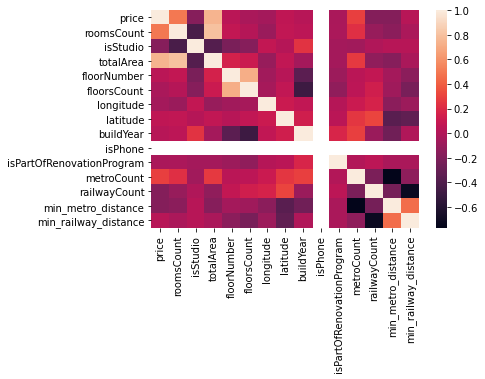

In [31]:
sns.heatmap(df.corr().round(2))

In [32]:
import numpy as np
np.bincount(df["isPhone"])

array([    0, 18289], dtype=int64)

In [33]:
#удалим колонку isPhone, так как она целиком заполнена только единицами
df.drop(columns=["isPhone"],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)
df.shape

(18289, 22)

In [34]:
#посмотрим ещё раз на типы данных, всё ли в порядке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18289 entries, 0 to 18288
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      18289 non-null  float64
 1   roomsCount                 18289 non-null  int32  
 2   isStudio                   18289 non-null  int32  
 3   totalArea                  18289 non-null  float64
 4   developerName              18289 non-null  object 
 5   jkName                     18289 non-null  object 
 6   floorNumber                18289 non-null  int32  
 7   floorsCount                18289 non-null  int32  
 8   longitude                  18289 non-null  float64
 9   latitude                   18289 non-null  float64
 10  buildYear                  18289 non-null  int32  
 11  materialType               18289 non-null  object 
 12  offerType                  18289 non-null  object 
 13  rayon                      18289 non-null  obj

In [35]:
#у kitchenArea и livingArea показан тип object, то есть текст, хотя они должны быть типа float. Приводим их к этому типу
#также у них надо удалить пропуски (значения, равные -1)
df["kitchenArea"]=df["kitchenArea"].astype("float64")
df["livingArea"]=df["livingArea"].astype("float64")

<ipython-input-35-733e971fffd5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-733e971fffd5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df["livingArea"].value_counts()

-1.0      6718
 20.0      192
 15.0      165
 30.0      153
 12.0      152
          ... 
 83.3        1
 97.7        1
 7.5         1
 176.0       1
 64.6        1
Name: livingArea, Length: 857, dtype: int64

In [37]:
df["kitchenArea"].value_counts()

-1.0     6959
 2.0      869
 10.0     564
 6.0      484
 9.0      323
         ... 
 42.7       1
 59.0       1
 51.7       1
 70.0       1
 28.6       1
Name: kitchenArea, Length: 362, dtype: int64

In [38]:
#посмотрим на корреляцию kitchenArea и цены
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["price"].values)

array([[1.        , 0.36794985],
       [0.36794985, 1.        ]])

In [39]:
#то же самое с livingArea
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["price"].values)

array([[1.        , 0.70730881],
       [0.70730881, 1.        ]])

In [40]:
#связь с totalArea
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["totalArea"].values)

array([[1.        , 0.54567976],
       [0.54567976, 1.        ]])

In [41]:
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["totalArea"].values)

array([[1.        , 0.93478491],
       [0.93478491, 1.        ]])

In [42]:
#соотношение totalArea и kitchenArea
total_kitchen=sum(df[df["kitchenArea"]>=0]["totalArea"])/sum(df[df["kitchenArea"]>=0]["kitchenArea"])
total_kitchen

4.825072274725219

In [43]:
#соотношение totalArea и livingArea
total_living=sum(df[df["livingArea"]>=0]["totalArea"])/sum(df[df["livingArea"]>=0]["livingArea"])
total_living

1.8249509627047273

In [44]:
df["c_kitchen"]=df["totalArea"]/total_kitchen
df["c_kitchen"]

<ipython-input-44-d276556f79e3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         29.636862
1         21.968583
2          8.580182
3         16.580063
4          2.217583
            ...    
18284     21.139580
18285      4.062115
18286      8.062055
18287     28.911484
18288    113.987930
Name: c_kitchen, Length: 18289, dtype: float64

In [45]:
df["c_living"]=df["totalArea"]/total_living
df["c_living"]

<ipython-input-45-7137503ec0ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         78.358270
1         58.083752
2         22.685541
3         43.836794
4          5.863171
            ...    
18284     55.891913
18285     10.740015
18286     21.315641
18287     76.440410
18288    301.377961
Name: c_living, Length: 18289, dtype: float64

In [46]:
#производим замену значений, которые равны -1.0
df.loc[df["livingArea"]<0,"livingArea"]=df["c_living"]
df["livingArea"]

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         78.358270
1         58.083752
2         29.000000
3         43.836794
4          5.863171
            ...    
18284     63.000000
18285      9.400000
18286     13.400000
18287     76.440410
18288    301.377961
Name: livingArea, Length: 18289, dtype: float64

In [47]:
df.loc[df["kitchenArea"]<0,"kitchenArea"]=df["c_kitchen"]
df["kitchenArea"]

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         29.636862
1         21.968583
2          8.000000
3         16.580063
4          2.217583
            ...    
18284      9.000000
18285      5.000000
18286     13.700000
18287     28.911484
18288    113.987930
Name: kitchenArea, Length: 18289, dtype: float64

In [48]:
#заново смотрим корреляции (kitchenArea и totalArea)
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["totalArea"].values)

array([[1.        , 0.84456895],
       [0.84456895, 1.        ]])

In [49]:
#livingArea и totalArea
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["totalArea"].values)

array([[1.        , 0.97236199],
       [0.97236199, 1.        ]])

In [50]:
#kitchenArea и price
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["price"].values)

array([[1.       , 0.6667355],
       [0.6667355, 1.       ]])

In [51]:
#livingArea и price
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["price"].values)

array([[1.       , 0.7268213],
       [0.7268213, 1.       ]])

In [52]:
df.drop(columns=["c_living","c_kitchen"],inplace=True)

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
#код по получению расстояния и азимута: https://github.com/maxbobkov/ml_moscow_flats/blob/master/moscow_flats_models.ipynb

In [54]:
import math
def get_azimuth(latitude, longitude):
 
    rad = 6372795

    llat1 = city_center_coordinates[0]
    llong1 = city_center_coordinates[1]
    llat2 = latitude
    llong2 = longitude

    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.

    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)

    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)

    x = (cl1*sl2) - (sl1*cl2*cdelta)
    y = sdelta*cl2
    z = math.degrees(math.atan(-y/x))

    if (x < 0):
        z = z+180.

    z2 = (z+180.) % 360. - 180.
    z2 = - math.radians(z2)
    anglerad2 = z2 - ((2*math.pi)*math.floor((z2/(2*math.pi))) )
    angledeg = (anglerad2*180.)/math.pi
    
    return angledeg

In [55]:
#определяем азимут
city_center_coordinates = [55.7522, 37.6156]
df["azimuth"]=list(map(lambda x, y: get_azimuth(x, y), df['latitude'], df['longitude']))

<ipython-input-55-9dc8a86edda4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
#определяем расстояние до центра города
from geopy.distance import geodesic 
df["distance"]=list(map(lambda x, y: geodesic(city_center_coordinates, [x, y]).kilometers, df['latitude'], df['longitude']))

<ipython-input-56-af4a1f9e7fc6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
#теперь надо закодировать все строковые элементы, сделаем это с помощью двоичного кодирования (образует меньше столбцов, чем OneHotEncoder) - источник: https://www.machinelearningmastery.ru/all-about-categorical-variable-encoding-305f3361fd02/
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=["developerName"])
encoder.fit_transform(df["developerName"])

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,developerName_6,developerName_7,developerName_8
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
18284,0,0,0,0,0,0,0,1,1
18285,0,0,0,0,0,1,1,0,1
18286,0,0,0,0,1,1,1,0,0
18287,0,0,0,0,0,0,1,1,0


In [58]:
for column,dtype in zip(df.dtypes.index,df.dtypes):
    if dtype=="object" and column!="description":
        encoder=ce.BinaryEncoder(cols=column)
        encoded=encoder.fit_transform(df[column])
        df.drop(columns=column,inplace=True)
        df=pd.concat([df,encoded],axis=1)
df

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: Fut

,price,roomsCount,isStudio,totalArea,floorNumber,floorsCount,longitude,latitude,buildYear,description,livingArea,kitchenArea,isPartOfRenovationProgram,metroCount,railwayCount,min_metro_distance,min_railway_distance,azimuth,distance,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,developerName_6,developerName_7,developerName_8,jkName_0,jkName_1,jkName_2,jkName_3,jkName_4,jkName_5,jkName_6,jkName_7,jkName_8,jkName_9,materialType_0,materialType_1,materialType_2,materialType_3,offerType_0,offerType_1,offerType_2,rayon_0,rayon_1,rayon_2,rayon_3,rayon_4,rayon_5,rayon_6,rayon_7
0,79530000.0,3,0,143.0,2,14,37.570500,55.725610,0,«Садовые кварталы» - уникальная концепция прем...,78.358270,29.636862,0,9,1,0.609,1.888,223.695840,4.097481,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,31675855.0,2,0,106.0,8,12,37.679560,55.773980,0,"Предлагается 2-комнатные апартаменты, общей пл...",58.083752,21.968583,0,5,5,0.178,1.233,58.788996,4.690487,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,8700000.0,2,0,41.4,2,17,37.191187,55.965546,7,Евродвушка на базе 1-комнатной квартиры свобод...,29.000000,8.000000,0,0,0,4.982,4.998,312.025628,35.644858,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
3,27500000.0,3,0,80.0,5,8,37.555609,55.747897,64,Лот 62247. В западном округе Москвы в кирпично...,43.836794,16.580063,0,8,2,0.803,0.798,262.762437,3.797479,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,2300000.0,1,1,10.7,1,9,37.596049,55.615044,51,Продам уютную небольшую студию всего в 5 минут...,5.863171,2.217583,0,7,3,0.631,2.477,184.602598,15.319849,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18284,26900000.0,3,0,102.0,2,8,37.658589,55.823388,63,Предлагается просторная 3-комнатная квартира с...,63.000000,9.000000,0,5,5,1.119,0.993,18.736489,8.372185,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1
18285,5587960.0,1,1,19.6,30,33,37.755070,55.805920,12,Новостройка! Продается 1-комн. кв-ра площадью ...,9.400000,5.000000,0,10,0,0.643,4.998,55.535488,10.600085,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1
18286,7356768.0,1,0,38.9,11,22,37.418660,55.631650,0,Скидка до 5% при 100% оплате! При покупке сраз...,13.400000,13.700000,0,3,4,1.052,2.387,222.720579,18.262844,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
18287,25106804.0,3,0,139.5,41,56,37.658030,55.834460,0,Жилой комплекс «Триколор» – это современные ин...,76.440410,28.911484,0,6,4,0.842,1.040,16.153256,9.537529,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,1


In [59]:
#надо дропнуть столбцы с нулевой суммой

In [60]:
for column,dtype in zip(df.columns,df.dtypes):
    if dtype!="object" and sum(df[column])==0:
        df.drop(columns=column,inplace=True)

<AxesSubplot:>

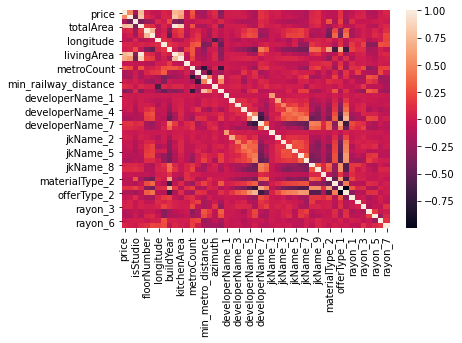

In [61]:
sns.heatmap(df.corr())

In [62]:
df.drop(columns=["description"],inplace=True)

In [63]:
#для визуализации:
#df.to_excel("диплом данные для визуализации.xlsx")

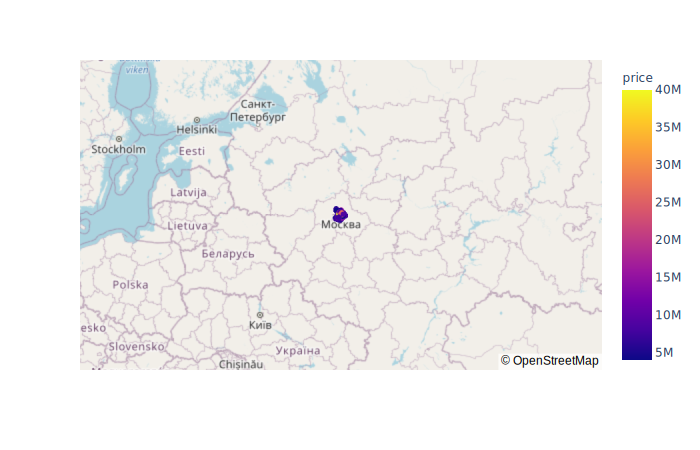

In [64]:
import plotly.express as px
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_data=["price","roomsCount","totalArea"], color="price",
                        zoom=3, height=300, range_color=[4000000,40000000,70000000,2598851500])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=1000, height=700)
fig.show()

In [65]:
from IPython.display import Image
Image(url="newplot (2).png")

In [66]:
#сохраняем нашу визуализацию
#fig.write_html("diplom_price_visualization_map.html")

In [67]:
df.drop(columns=["longitude","latitude"],inplace=True)

In [68]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error
def print_metrics(prediction, val_y):
    val_mae = mean_absolute_error(val_y, prediction)
    median_AE = median_absolute_error(val_y, prediction)
    r2 = r2_score(val_y, prediction)

    print('')
    print('R\u00b2: {:.2}'.format(r2))
    print('')
    print('Средняя абсолютная ошибка: {:.3} %'.format(mean_absolute_percentage_error(val_y, prediction)))
    print('Медианная абсолютная ошибка: {:.3} %'.format(median_absolute_percentage_error(val_y, prediction)))
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
y=df.iloc[:,0].values
X=df.iloc[:,1:].values
y=np.log(y)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=2)
rf.fit(train_X,train_y)

RandomForestRegressor()

In [70]:
from sklearn.model_selection import cross_val_score
print("перекрестная проверка", cross_val_score(rf, X, np.ravel(y), cv=5))

перекрестная проверка [0.97618065 0.97367777 0.97286579 0.9766562  0.97417485]


<AxesSubplot:>

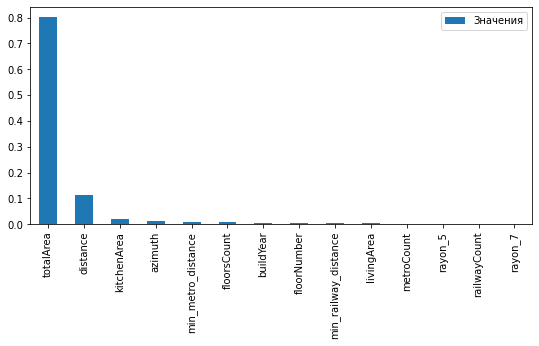

In [71]:
import matplotlib.pyplot as plt
features=pd.DataFrame(data=rf.feature_importances_,index=df.columns[1:],columns=["Значения"])
features_sorted=features.sort_values(by=["Значения"])[::-1][features.sort_values(by=["Значения"])[::-1]>0.001].dropna()
features_sorted.plot(kind="bar", figsize=(9,4))

In [72]:
average_price=[]
for year in np.unique(df["buildYear"]):
    df_year=df.copy()
    df_year["buildYear"]=year
    X=df_year.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

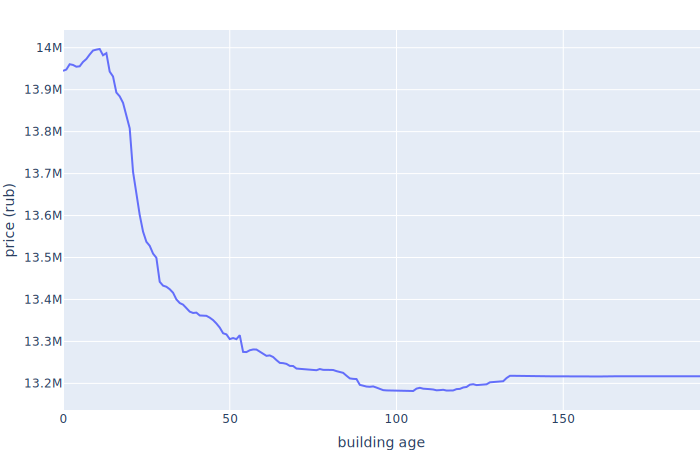

In [73]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["buildYear"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="building age",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [74]:
#должна быть корреляция между возрастом здания и близостью к центру (например), или этажностью

Скорее всего анализ по году постройки не получился потому, что у строений с разным возрастом есть какие-то сопутствующие характеристики - например, старые здания, как правило, находятся в центре города и в таких квартирах большая площадь.Если мы присваиваем большой возраст новостройкам с их характеристиками, которые, как правило, имеют меньшую площадь и находятся на краю Москвы, то по факту это будет означать, что, возможно, здание уже аварийное. К тому же на сайте преобладали в основном новостройки. Поэтому возраст здания нельзя рассматривать совместно с другими характеристиками, только отдельно 

Для более быстрых расчетов следующих графиков можно округлить рассматриваемые значения (чтобы было меньше уникальных значений)

In [75]:
average_price=[]
for azimuth in np.unique(df["azimuth"].round(0)):
    df_azimuth=df.copy()
    df_azimuth["azimuth"]=azimuth
    X=df_azimuth.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

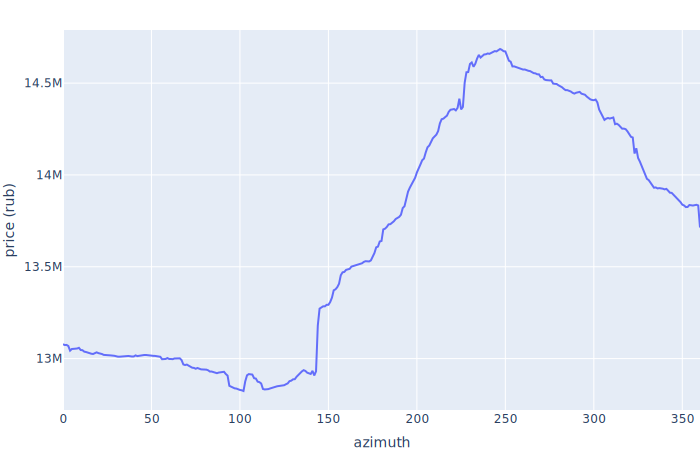

In [76]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["azimuth"].round(0)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="azimuth",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [77]:
df.sort_values(by="buildYear",ascending=False)

,price,roomsCount,isStudio,totalArea,floorNumber,floorsCount,buildYear,livingArea,kitchenArea,isPartOfRenovationProgram,metroCount,railwayCount,min_metro_distance,min_railway_distance,azimuth,distance,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,developerName_6,developerName_7,developerName_8,jkName_1,jkName_2,jkName_3,jkName_4,jkName_5,jkName_6,jkName_7,jkName_8,jkName_9,materialType_1,materialType_2,materialType_3,offerType_1,offerType_2,rayon_1,rayon_2,rayon_3,rayon_4,rayon_5,rayon_6,rayon_7
3342,137999900.0,5,0,179.0,3,5,191,98.084827,37.097890,0,9,1,0.662,1.621,243.223867,1.920555,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1
8932,25800000.0,3,0,71.0,5,5,166,38.905155,14.714805,0,9,1,0.199,1.572,265.686956,2.088189,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0
10530,25800000.0,3,0,71.0,5,5,166,49.000000,14.714805,0,9,1,0.191,1.566,265.489220,2.090447,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0
10612,80000000.0,7,0,142.0,2,3,165,77.810310,29.429611,0,10,0,0.646,4.998,259.827009,1.329202,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0
9121,18000000.0,1,0,37.0,4,4,161,20.400000,9.000000,0,9,1,0.461,1.356,77.880955,1.633865,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882,17354000.0,2,0,56.9,2,15,0,24.100000,12.800000,0,7,3,1.110,1.008,67.052133,5.798582,0,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
7883,15036000.0,2,0,56.0,12,30,0,24.800000,17.300000,0,4,6,1.265,1.617,112.342585,10.397151,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0
7884,9324501.0,2,0,49.4,8,18,0,25.300000,11.100000,0,2,0,3.626,4.998,213.265004,21.565671,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0
7886,6200000.0,1,0,31.0,8,12,0,16.986758,6.424774,0,0,0,4.982,4.998,220.452331,29.481176,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0


In [78]:
average_price=[]
for distance in np.unique(df["distance"].round(1)):
    df_distance=df.copy()
    df_distance["distance"]=distance
    X=df_distance.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

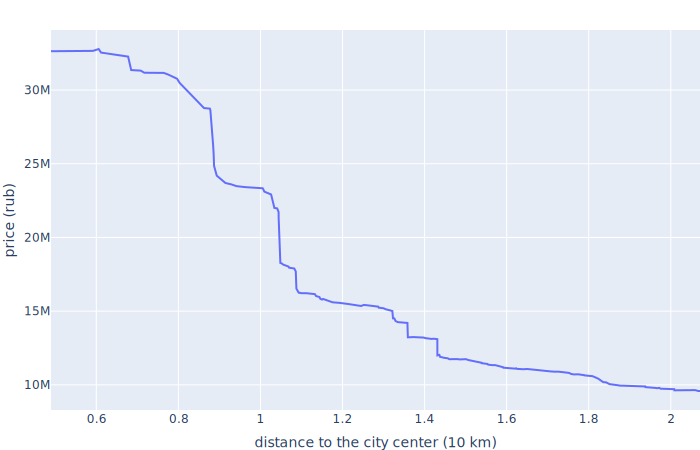

In [79]:
#исправить подпись к графику
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["distance"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="distance to the city center (10 km)",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [80]:
average_price=[]
for floor_number in np.unique(df["floorNumber"]):
    df_floor_number=df.copy()
    df_floor_number["floorNumber"]=floor_number
    X=df_floor_number.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

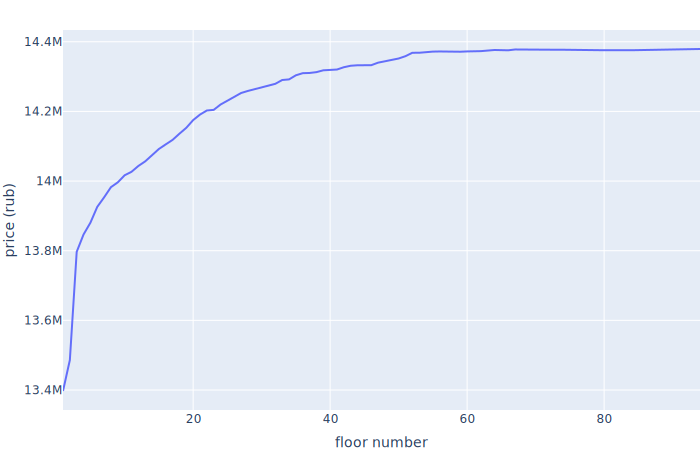

In [81]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["floorNumber"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="floor number",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [82]:
average_price=[]
for floors_count in np.unique(df["floorsCount"]):
    df_floors_count=df.copy()
    df_floors_count["floorsCount"]=floors_count
    X=df_floors_count.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

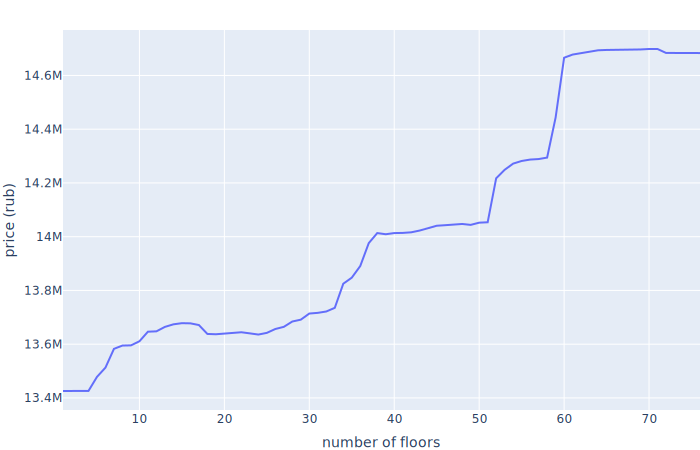

In [83]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["floorNumber"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="number of floors",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [86]:
df["roomsCount"].value_counts()

1    6882
2    5655
3    4084
4    1153
5     453
7      40
9      11
8      11
Name: roomsCount, dtype: int64

In [87]:
average_price=[]
for metro_count in np.unique(df["metroCount"]):
    df_metro_count=df.copy()
    df_metro_count["metroCount"]=metro_count
    X=df_metro_count.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

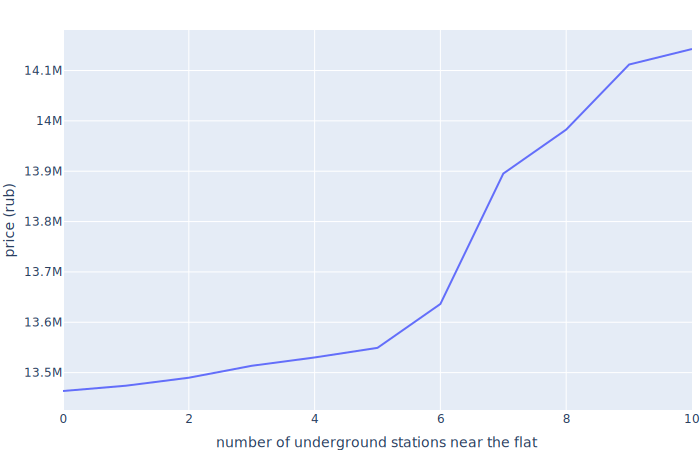

In [88]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["metroCount"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="number of underground stations near the flat",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [91]:
average_price=[]
for min_metro_distance in np.unique(df["min_metro_distance"].round(2)):
    df_min_metro_distance=df.copy()
    df_min_metro_distance["min_metro_distance"]=min_metro_distance
    X=df_min_metro_distance.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

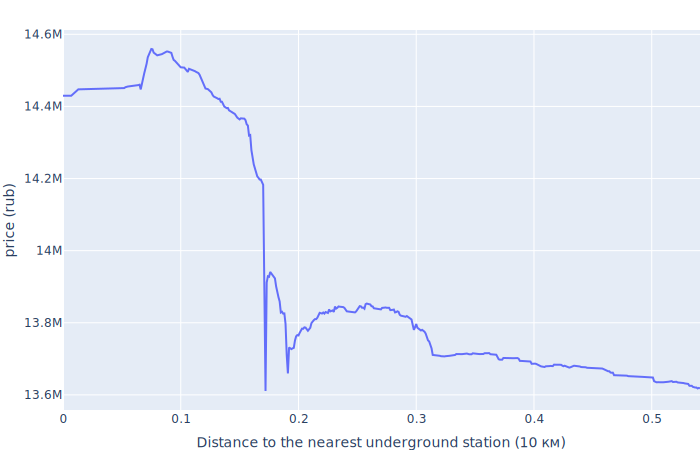

In [92]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["min_metro_distance"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Distance to the nearest underground station (10 км)",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [93]:
average_price=[]
for min_railway_distance in np.unique(df["min_railway_distance"].round(2)):
    df_min_railway_distance=df.copy()
    df_min_railway_distance["min_railway_distance"]=min_railway_distance
    X=df_min_railway_distance.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

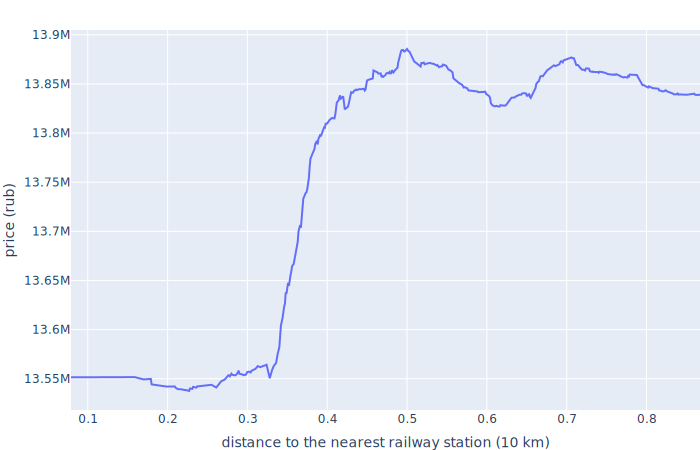

In [94]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["min_railway_distance"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="distance to the nearest railway station (10 km)",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [95]:
average_price=[]
for totalArea in np.unique(df["totalArea"].round(0)):
    df_totalArea=df.copy()
    df_totalArea["totalArea"]=totalArea
    X=df_totalArea.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

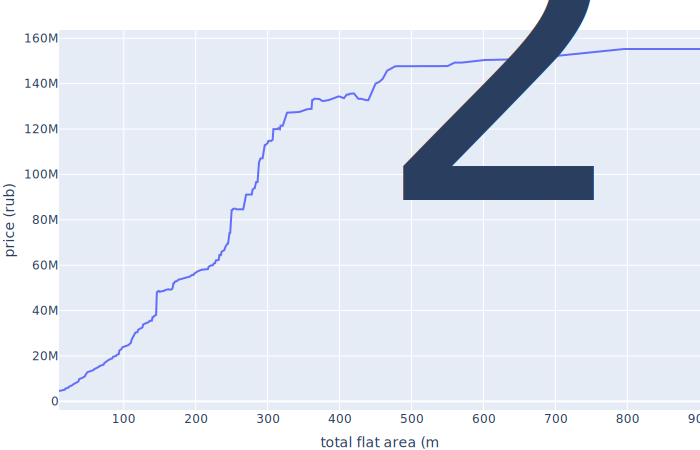

In [96]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["totalArea"].round(0)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="total flat area (m<sup>2</sup>)",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [97]:
average_price=[]
for kitchenArea in np.unique(df["kitchenArea"].round(0)):
    df_kitchenArea=df.copy()
    df_kitchenArea["kitchenArea"]=kitchenArea
    X=df_kitchenArea.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

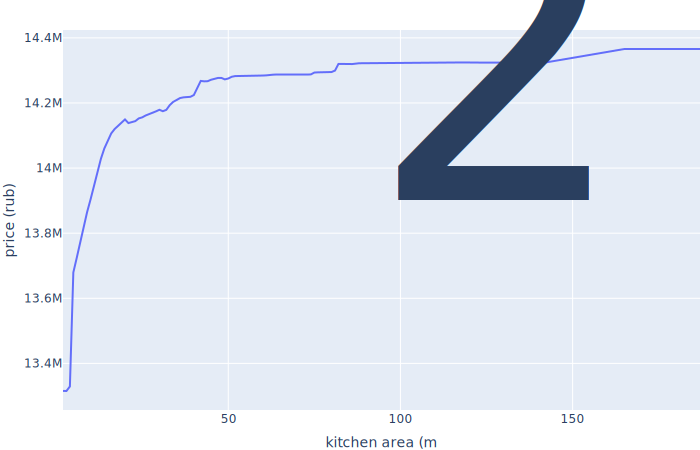

In [98]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["kitchenArea"].round(0)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="kitchen area (m<sup>2</sup>)",
                  yaxis_title="price (rub)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()